In [18]:
import cv2 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [139]:
# kontrola na Ivorovi, Vladovi a  Borovanskom len tak zo srandy


# Face classifier

# Default - nenasiel Vlada
face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

# Alt - nenasiel Borovanskeho a Vlada
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml")

# Alt 2 - nenasiel Borovanskeho a Vlada
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt2.xml")

# Alt tree - nenasiel ani jedneho
#face_cascade = cv2.CascadeClassifier("C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_alt_tree.xml")


# Eye classiefier

# Default - najde nieco ale aj blbosti - u Vlada to oci nenaslo
eye_cascade = cv2.CascadeClassifier('C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_eye.xml')

# Tree (eyeglasses) - nenachadza blbosti ale ani Vlada
#eye_cascade = cv2.CascadeClassifier('C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml') 


# Smile classifier
smile_cascade = cv2.CascadeClassifier('C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_smile.xml') 


# Left eye 
lEye_cascade = cv2.CascadeClassifier('C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_lefteye_2splits.xml') 

# Right eye 
rEye_cascade = cv2.CascadeClassifier('C:/Users/majko/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_righteye_2splits.xml') 

# upravov parametrov sa daju ziskat lepsie vysledky

(262, 295, 3)
(600, 400, 3)
(600, 400, 3)


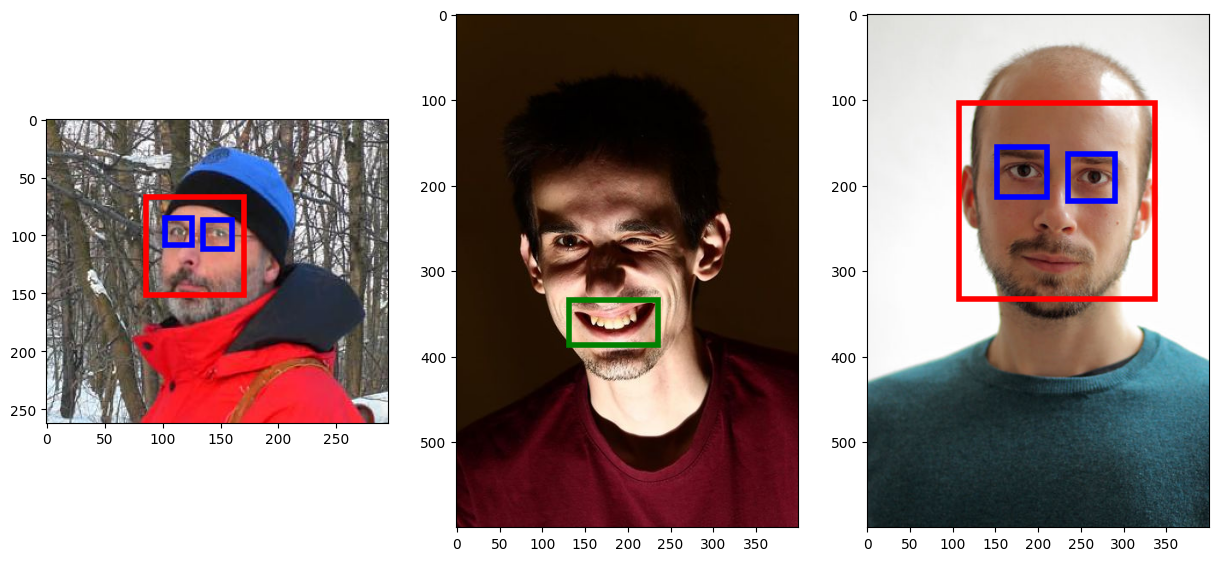

In [141]:
# capture frames from a camera
#cap = cv2.VideoCapture(0)
  
fig, ax = plt.subplots(1,3,figsize=(15, 9))
  
# reads frames from a camera
#ret, img = cap.read() 
imgs = [cv2.imread("DAI/big/Peter Borovansky.jpg"),
        cv2.imread("DAI/big/Vladimir Boza.jpg"),
        cv2.imread("DAI/big/Ivor Uhliarik.jpg")]
for i, img  in enumerate(imgs):
    print(img.shape)

    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ax[i].imshow(img2)


    # Detects faces of different sizes in the input image
    faces = ()
    eyes = ()
    smiles = ()
    leftEyes = ()
    rightEyes = () 
    faces = face_cascade.detectMultiScale(gray, 
                                          scaleFactor = 1.1, 
                                          minNeighbors = 10)
    eyes = eye_cascade.detectMultiScale(gray,
                                        scaleFactor = 1.1, 
                                        minNeighbors = 10) 
    smiles = smile_cascade.detectMultiScale(gray,
                                            scaleFactor = 1.7, 
                                            minNeighbors = 18)
    """
    leftEyes = lEye_cascade.detectMultiScale(gray,
                                             scaleFactor = 1.1, 
                                             minNeighbors = 10)
    rightEyes = rEye_cascade.detectMultiScale(gray,
                                              scaleFactor = 1.1, 
                                              minNeighbors = 10)
    """
    #print(faces)
    #print(eyes)
    #print(smiles)

    for (x,y,w,h) in faces:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='red',
                               facecolor='none',
                               lw=4))

    for (x,y,w,h) in eyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='blue',
                               facecolor='none',
                               lw=4))

    for (x,y,w,h) in smiles:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='green',
                               facecolor='none',
                               lw=4))
    
    """
    for (x,y,w,h) in leftEyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='pink',
                               facecolor='none',
                               lw=4))
    
    for (x,y,w,h) in rightEyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='yellow',
                               facecolor='none',
                               lw=4))
    """
    
#cv2.imshow('img',img)
plt.show()

  
# Close the window
#cap.release()
  
# De-allocate any associated memory usage
#cv2.destroyAllWindows() 